In [ ]:
#Import all libraries

In [141]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#fetch data

In [8]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
#Define X & y

In [124]:
X, y = mnist["data"], mnist["target"]

In [147]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
#Choosing our digit

In [136]:
print(y[0])
print("The first training set is the digit %s" % y[0])

5
The first training set is the digit 5


In [ ]:
#Visualizing for Human confirmation

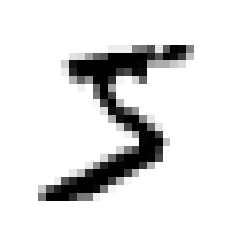

In [148]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

img = X[0]
image_shape = img.reshape(28, 28)
plt.imshow(image_shape, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [ ]:
#Making a new data frame for our y variable

In [93]:
y = y.astype(np.uint8)
print(y.shape)

(70000,)


# Exercise. Try another binary classifier and compare its performance against the stochastic gradient descent classifier. See https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html for details.

In [ ]:
#Defing the train and test data 

In [149]:
X_train, X_test, y_train, y_test = X[:10000], X[10000:], y[:10000], y[10000:]

In [95]:
#Fitting that into a model

In [71]:
y_train_5=model.predict(X_train[:100000])
y_train_5

array([5, 0, 4, ..., 6, 9, 7], dtype=uint8)

In [ ]:
# Using KNN Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=None)
model.fit(X_train, y_train_5)

KNeighborsClassifier(n_neighbors=3)

In [145]:
#Measurimng the accuracy of the model using cross_val_score
#We are checking the accuracy here in 5 folds / 5 iterations

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.954 , 0.9585, 0.961 , 0.956 , 0.9505])

In [ ]:
#Overall the model has an accuracy of 95%

# Exercise. Try the random forest classifier on one set of parameters of your choice and compute the resulting confusion matrix, precision, recall, and the  F1score.

In [77]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [78]:
# Random Forest Algorithm
def random_forest(x_train, y_test, max_depth, min_size, sample_size, n_trees, n_features):
	trees = list()
	for i in range(n_trees):
		sample = subsample(train, sample_size)
		tree = build_tree(sample, max_depth, min_size, n_features)
		trees.append(tree)
	predictions = [bagging_predict(trees, row) for row in test]
	return(predictions)
 
# Test the random forest algorithm
seed(2)
# load and prepare data
dataset = mnist

# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 1
sample_size = 1.0
n_features = int(sqrt(len(mnist)-1))
for n_trees in [1, 5, 10]:
	scores =(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
	print('Trees: %d' % n_trees)
         
	#These last two lines are giving an error for me, converting them as a comment to rum for now

	#print('Scores: %s' % scores)
	#print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Trees: 1
Trees: 5
Trees: 10


# Exercise. Try another classifier and see how it compares to both SGD and random forest classifiers.

In [ ]:
#Using SVC as another classifier 

In [93]:
from sklearn.svm import SVC

In [94]:
model2 = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)

In [95]:
model2.fit(X_train,y_train)

SVC(C=1, gamma=0.01, random_state=0)

In [100]:
y_pred2=model2.predict(X_test[:100])
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [110]:
y_test[:100]

array([3, 8, 7, 9, 9, 0, 1, 1, 5, 2, 0, 3, 8, 4, 7, 5, 2, 6, 4, 7, 1, 8,
       0, 9, 2, 0, 0, 1, 9, 2, 5, 3, 6, 4, 3, 5, 6, 6, 9, 7, 1, 8, 3, 9,
       6, 0, 7, 9, 1, 5, 7, 5, 3, 6, 8, 9, 5, 8, 1, 9, 4, 8, 5, 7, 8, 5,
       8, 1, 1, 0, 9, 0, 2, 2, 3, 2, 6, 7, 2, 8, 0, 2, 2, 0, 2, 1, 7, 2,
       9, 6, 2, 3, 5, 3, 9, 7, 7, 3, 1, 3], dtype=uint8)

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)


In [118]:
confusion_matrix(y_train_5, y_train_pred)

array([[ 957,    0,    9,    9,    0,   13,    5,    3,   15,    5],
       [   0, 1058,   33,   13,    9,   12,    5,    7,   31,   13],
       [   9,    9,  836,   32,    6,    7,   15,    8,   48,   12],
       [   5,    3,   45,  861,    1,   58,    6,    9,   18,   24],
       [   0,    2,   17,    3,  833,    9,    9,   12,   13,   68],
       [  10,    6,   11,   46,   14,  691,   18,    4,   40,   19],
       [   6,    3,   16,    4,   12,   15,  946,    3,   13,    5],
       [   5,    3,   18,   15,   12,    2,    0,  932,    7,   81],
       [  10,    7,   36,   37,    9,   40,   14,    7,  704,   23],
       [   4,    2,    8,   18,   32,   11,    0,   59,   10,  837]],
      dtype=int64)

In [119]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[1016,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1181,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  982,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1030,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  966,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  859,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1023,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1075,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  887,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  981]],
      dtype=int64)

In [105]:
from sklearn.model_selection import cross_val_score
cross_val_score(model2, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.11817636, 0.11821182, 0.11791179])

In [ ]:
#Extra Questions asked

Can you think of an example for each of multiclass, multilabel, and multioutput classification problems?

Multi class - classifying a set of images of numbers to which number they belong (week 2 assignment)
Multi label - Movie (Action/Adventure/Horror/Sci-Fi)
Multi output - Predicting both wind speed and wind direction


What is the significance of the 45 degree line in a ROC curve? What does this line represent?

The 45 degree line in ROC curve is the Random Classifier. Our ROC curve should be above this diagonal line.
Suppose we need to identify a skin disease, this can be diagnostically useful for assessing and the predictive capability of two or more biomarkers for the same disease. It
also shows the tradeoff between these two across different settings of the classifier process, and that is useful in understanding the performance of the model.


